Assignment Code: DA-AG-008


#Machine Learning Intro | Assignment


#Question 1: Explain the differences between AI, ML, Deep Learning (DL), and Data Science (DS).

#.
Artificial Intelligence (AI):
Broad field of making machines “think” and act intelligently like humans.

Machine Learning (ML):
A subset of AI where machines learn from data and improve without being explicitly programmed.

Deep Learning (DL):
A subset of ML that uses neural networks with many layers to learn complex patterns (e.g., image recognition, speech).

Data Science (DS):
Field focused on extracting insights and knowledge from data using statistics, ML, and domain expertise.

#Question 2: What are the types of machine learning? Describe each with one real-world example.


Machine Learning has three main types:

Supervised Learning – The model is trained on labeled data (input + correct output).
Example: Predicting house prices based on size, location, etc.

Unsupervised Learning – The model finds hidden patterns in unlabeled data.
Example: Customer segmentation in marketing.

Reinforcement Learning – The model learns by interacting with an environment and receiving rewards or penalties.
Example: Training a robot to walk or self-driving cars learning to navigate.

#Question 3: Define overfitting, underfitting, and the bias-variance tradeoff in machine learning.



1.Overfitting: Model learns training data too well (including noise), performs poorly on new data.

2.Underfitting: Model is too simple, fails to capture patterns in data.

3.Bias-Variance Tradeoff: Balancing error from overly simple models (high bias) vs. overly complex models (high variance) to achieve good generalization

#Question 4: What are outliers in a dataset, and list three common techniques for handling them.



Outliers: Data points that differ significantly from most of the dataset, often due to variability or errors.

Common techniques to handle them:

1.Removal – Delete extreme values if they are errors.

2.Transformation – Apply log/Box-Cox scaling to reduce impact.

3.Imputation/Replacement – Replace with mean, median, or use capping (e.g., winsorization).

#Question 5: Explain the process of handling missing values and mention one imputation technique for numerical and one for categorical data.


Handling missing values involves detecting them, analyzing the reason, and then treating them by removal or imputation.

. Numerical data imputation: Replace with mean/median.

. Categorical data imputation: Replace with mode (most frequent value).



#Question 6: Write a Python program that:

● Creates a synthetic imbalanced dataset with make_classification() from
sklearn.datasets.

● Prints the class distribution.


In [1]:
from sklearn.datasets import make_classification
import numpy as np
from collections import Counter

# Create synthetic imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2,
                           n_informative=2, n_redundant=0,
                           weights=[0.9, 0.1], random_state=42)

# Print class distribution
class_distribution = Counter(y)
print("Class distribution:", class_distribution)


Class distribution: Counter({np.int64(0): 897, np.int64(1): 103})


#Question 7: Implement one-hot encoding using pandas for the following list of colors:
['Red', 'Green', 'Blue', 'Green', 'Red']. Print the resulting dataframe.

In [3]:
import pandas as pd

# List of colors
colors = ['Red', 'Green', 'Blue', 'Green', 'Red']

# Create DataFrame
df = pd.DataFrame(colors, columns=['Color'])

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Color'])

# Print the resulting DataFrame
print(df_encoded)


   Color_Blue  Color_Green  Color_Red
0       False        False       True
1       False         True      False
2        True        False      False
3       False         True      False
4       False        False       True


#Question 8: Write a Python script to:

● Generate 1000 samples from a normal distribution.

● Introduce 50 random missing values.

● Fill missing values with the column mean.

● Plot a histogram before and after imputation.

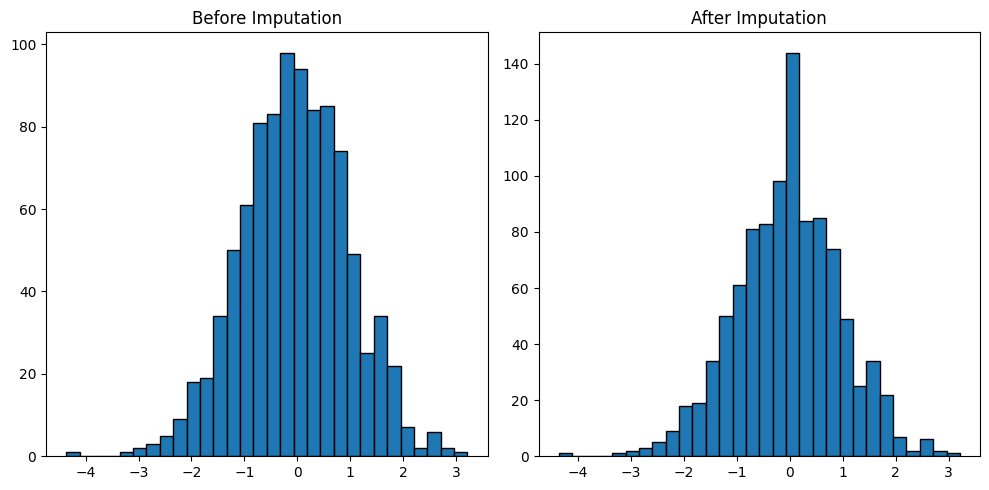

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Generate 1000 samples from a normal distribution
data = np.random.normal(loc=0, scale=1, size=1000)

# Convert to DataFrame
df = pd.DataFrame(data, columns=['Values'])

# Step 2: Introduce 50 random missing values
missing_indices = np.random.choice(df.index, 50, replace=False)
df.loc[missing_indices, 'Values'] = np.nan

# Step 3: Fill missing values with column mean
mean_value = df['Values'].mean()
df['Imputed'] = df['Values'].fillna(mean_value)

# Step 4: Plot histograms before and after imputation
plt.figure(figsize=(10, 5))

# Before imputation
plt.subplot(1, 2, 1)
plt.hist(df['Values'].dropna(), bins=30, edgecolor='black')
plt.title("Before Imputation")

# After imputation
plt.subplot(1, 2, 2)
plt.hist(df['Imputed'], bins=30, edgecolor='black')
plt.title("After Imputation")

plt.tight_layout()
plt.show()


#Question 9: Implement Min-Max scaling on the following list of numbers [2, 5, 10, 15, 20] using sklearn.preprocessing.MinMaxScaler. Print the scaled array.

In [5]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Data
data = np.array([[2], [5], [10], [15], [20]])

# Apply Min-Max Scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Print result
print("Scaled array:\n", scaled_data)


Scaled array:
 [[0.        ]
 [0.16666667]
 [0.44444444]
 [0.72222222]
 [1.        ]]


Question 10: You are working as a data scientist for a retail company. You receive a customer
transaction dataset that contains:

● Missing ages,

● Outliers in transaction amount,

● A highly imbalanced target (fraud vs. non-fraud),

● Categorical variables like payment method.

Explain the step-by-step data preparation plan you’d follow before training a machine learning
model. Include how you’d address missing data, outliers, imbalance, and encoding.


1.Train/test split first — do a time-aware or stratified split to prevent leakage; fit all preprocessors on train only.

2.Inspect missingness — check MCAR/MAR patterns for age; create an age_missing indicator.

3.Impute ages — use median or group-based median (e.g., by country/customer segment) or kNN; consider age bins if useful.

4.Handle transaction outliers — don’t drop blindly: detect with IQR/MAD, flag extreme values, apply log1p or RobustScaler, and optionally winsorize/cap (train-only).

5.Encode categoricals — low-cardinality → one-hot; high-cardinality → frequency/target encoding with K-fold out-of-fold scheme (or use CatBoost/LightGBM native handling); group rares into “Other.”

6.Address class imbalance — use class weights or train-only resampling (SMOTE/undersampling) inside CV folds; optimize threshold by business metric (precision/recall, AUPRC, cost).

7.Pipeline & validation — build a reproducible ColumnTransformer/Pipeline (or imblearn Pipeline), use stratified/time CV, log metrics, and preserve all flags/transformers for production.

8.Feature engineering & monitoring — add RFM/velocity/merchant/customer stats, then monitor model/data drift and recalibrate thresholds after deployment.